In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.1.0


In [2]:
# https://stackoverflow.com/questions/57469676/python-one-hot-encoding-for-comma-separated-values
def one_hot_encode(df):
    dummies = df['subjects'].str.get_dummies(sep=",")
    df_copy = pd.concat([df.drop('subjects', 1), dummies], 1)
    return (df_copy, dummies.columns)

In [3]:
train = pd.read_csv('train.tsv', delimiter='\t', header=None)
val = pd.read_csv('valid.tsv', delimiter='\t', header=None)
test = pd.read_csv('test.tsv', delimiter='\t', header=None)
rename_columns = ['ID', 'label', 'statement', 'subjects', 'speaker', 'speaker_job_title', 'state_info',
                  'party_affiliation', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire',
                  'context'
                 ]
train.columns = rename_columns
val.columns = rename_columns
test.columns = rename_columns
all_data = pd.concat([train, val, test])

# X_train, y_train = train.drop(drop_columns, axis=1), train['label']
# X_val, y_val = val.drop(drop_columns, axis=1), val['label']
# X_test, y_test = test.drop(drop_columns, axis=1), test['label']

In [4]:
train['label'].value_counts()

half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64

In [4]:
train['speaker'].value_counts()[:11]

barack-obama       488
donald-trump       273
hillary-clinton    239
mitt-romney        176
scott-walker       149
john-mccain        148
chain-email        142
rick-perry         142
marco-rubio        117
rick-scott         115
ted-cruz            93
Name: speaker, dtype: int64

In [5]:
train[train['speaker'] == 'barack-obama'].iloc[0]['party_affiliation']

'democrat'

In [6]:
test[test['speaker'] == 'barack-obama'].iloc[1]

ID                                                           8841.json
label                                                      mostly-true
statement            The federal minimum wage is worth about 20 per...
subjects                                economy,history,income,workers
speaker                                                   barack-obama
speaker_job_title                                            President
state_info                                                    Illinois
party_affiliation                                             democrat
barely_true                                                         70
false                                                               71
half_true                                                          160
mostly_true                                                        163
pants_on_fire                                                        9
context                                 the State of the Union address
Name: 

In [7]:
test[test['speaker'] == 'barack-obama'].iloc[1]['statement']

'The federal minimum wage is worth about 20 percent less than it was when Ronald Reagan gave his first address to a joint session of Congress.'

In [6]:
print(len(val))

1284


In [8]:
train.head()

,ID,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,barely_true,false,half_true,mostly_true,pants_on_fire,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [9]:
for i in range(50):
    print(train['statement'][i])

Says the Annies List political group supports third-trimester abortions on demand.
When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
Health care reform legislation is likely to mandate free sex change surgeries.
The economic turnaround started at the end of my term.
The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
Jim Dunnam has not lived in the district he represents for years now.
I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.
However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land the new NOAA Marine Operations Center-Pacific.
Says

In [10]:
# deal with NaNs
print('Train', train.isna().sum().to_dict())
print('Train length: ', len(train))
print('Val: ', val.isna().sum().to_dict())
print('Val length: ', len(val))
print('Test: ', test.isna().sum().to_dict())
print('Test length: ', len(test))

Train {'ID': 0, 'label': 0, 'statement': 0, 'subjects': 2, 'speaker': 2, 'speaker_job_title': 2897, 'state_info': 2208, 'party_affiliation': 2, 'barely_true': 2, 'false': 2, 'half_true': 2, 'mostly_true': 2, 'pants_on_fire': 2, 'context': 102}
Train length:  10240
Val:  {'ID': 0, 'label': 0, 'statement': 0, 'subjects': 0, 'speaker': 0, 'speaker_job_title': 345, 'state_info': 279, 'party_affiliation': 0, 'barely_true': 0, 'false': 0, 'half_true': 0, 'mostly_true': 0, 'pants_on_fire': 0, 'context': 12}
Val length:  1284
Test:  {'ID': 0, 'label': 0, 'statement': 0, 'subjects': 0, 'speaker': 0, 'speaker_job_title': 325, 'state_info': 262, 'party_affiliation': 0, 'barely_true': 0, 'false': 0, 'half_true': 0, 'mostly_true': 0, 'pants_on_fire': 0, 'context': 17}
Test length:  1267


<BarContainer object of 14 artists>

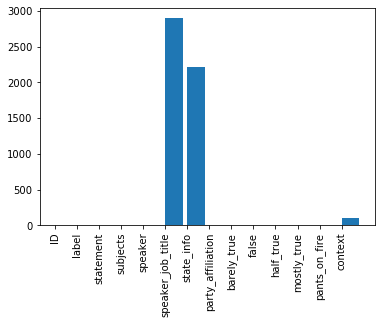

In [11]:
train_NaN = train.isna().sum().to_dict()
plt.xticks(rotation=90)
plt.bar(train_NaN.keys(), train_NaN.values(), align='edge')

In [12]:
'''
General:
ID: is extraneous information
speaker truth value counts: data leakage? this seems to include possible future information in the dataset?

NaNs:
drop speaker_job_title and state_info because just way too many NaNs to be able to fill them well with dummy values
context doesn't have too many but not sure I could use it. Since they are sentence, I think an empty string could be interpretd as no information
all other NaN were dropped by row
'''
# drop_columns = ['ID', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'speaker_job_title',
#                'state_info']
drop_columns = ['ID']
train.drop(drop_columns, axis=1, inplace = True)
train['context'].fillna('', inplace = True)
train.dropna(axis=0, how='all', subset=['subjects'], inplace=True)
train.dropna(axis=0, how='all', subset=['speaker'], inplace=True)
train.dropna(axis=0, how='all', subset=['party_affiliation'], inplace=True)

val.drop(drop_columns, axis=1, inplace = True)
val['context'].fillna('', inplace = True)
val.dropna(axis=0, how='all', subset=['subjects'], inplace=True)
val.dropna(axis=0, how='all', subset=['speaker'], inplace=True)
val.dropna(axis=0, how='all', subset=['party_affiliation'], inplace=True)

test.drop(drop_columns, axis=1, inplace = True)
test['context'].fillna('', inplace = True)
test.dropna(axis=0, how='all', subset=['subjects'], inplace=True)
test.dropna(axis=0, how='all', subset=['speaker'], inplace=True)
test.dropna(axis=0, how='all', subset=['party_affiliation'], inplace=True)

10238
half-true      2114
false          1993
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64


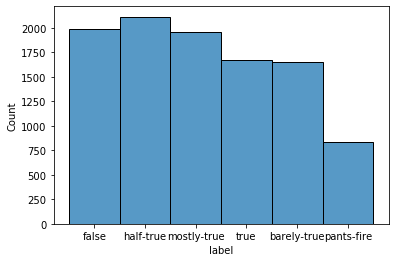

In [13]:
# histogram of labels to check for class imbalance
print(len(train['label']))
sns.histplot(data=train['label'])
print(train['label'].value_counts())

12791
half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: label, dtype: int64


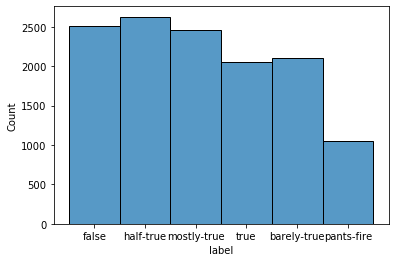

In [7]:
# histogram of labels to check for class imbalance
print(len(all_data['label']))
sns.histplot(data=all_data['label'])
print(all_data['label'].value_counts())

12791
false    8284
true     4507
Name: label, dtype: int64


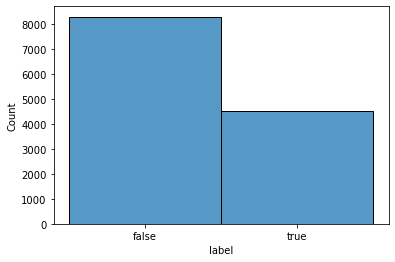

In [8]:
# spread of labels on binary classification
label_map = {'false': 'false', 'half-true': 'false', 'mostly-true': 'true', 'true': 'true', 'barely-true': 'false', 'pants-fire': 'false'}
y_all_data = pd.DataFrame()
y_all_data['label'] = all_data['label'].map(label_map)
print(len(y_all_data['label']))
sns.histplot(data=y_all_data['label'])
print(y_all_data['label'].value_counts())

1284
false          263
mostly-true    251
half-true      248
barely-true    237
true           169
pants-fire     116
Name: label, dtype: int64


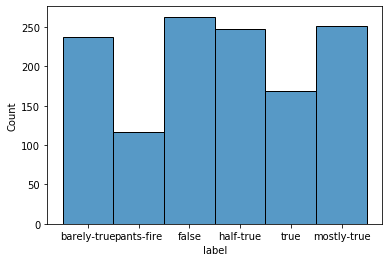

In [14]:
# histogram of labels on val
print(len(val['label']))
sns.histplot(data=val['label'])
print(val['label'].value_counts())

1267
half-true      265
false          249
mostly-true    241
barely-true    212
true           208
pants-fire      92
Name: label, dtype: int64


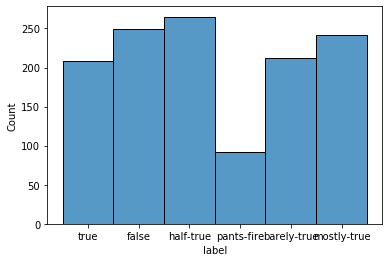

In [15]:
# histogram of labels on test
print(len(test['label']))
sns.histplot(data=test['label'])
print(test['label'].value_counts())

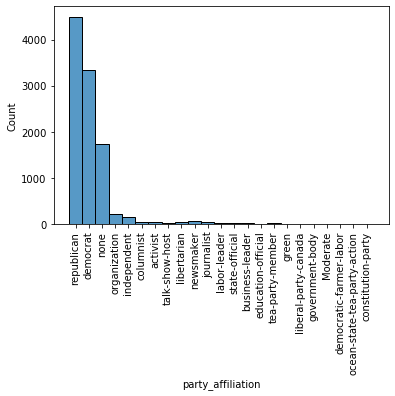

In [16]:
# histogram of party affiliation
'''
this could be an issue, some of these groups like tea_party_member are part of the Republican Party 
but that isn't considered here. How would model understand that a tea_party_member might share some 
ideas with Republican Party. Will be worth to see how well these points end up getting classified if
party_affiliation becomes an important feature
'''
g = sns.histplot(data=train['party_affiliation'])
g.set_xticklabels(labels=train['party_affiliation'].unique() ,rotation=90)
print()

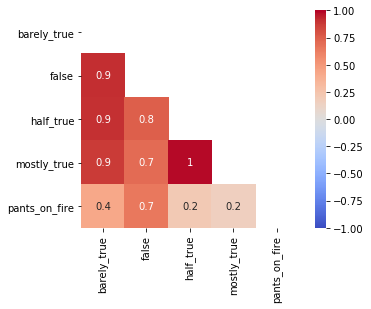

In [17]:
# correlation matrix - not that useful because it only works with numerical features
sns.heatmap(train.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm', square=True, mask=np.triu(train.corr()))

In [18]:
# one hot encode
train, subject_cols = one_hot_encode(train)

In [19]:
for subject_col in subject_cols:
    print(subject_col)

10-news-tampa-bay
Alcohol
abc-news-week
abortion
afghanistan
after-the-fact
agriculture
animals
autism
bankruptcy
baseball
bipartisanship
bush-administration
campaign-advertising
campaign-finance
candidates-biography
cap-and-trade
census
children
china
city-budget
city-government
civil-rights
climate-change
colbert-report
congress
congressional-rules
consumer-safety
corporations
corrections-and-updates
county-budget
county-government
crime
criminal-justice
death-penalty
debates
debt
deficit
disability
diversity
drugs
ebola
economy
education
elections
energy
environment
ethics
fake-news
families
federal-budget
financial-regulation
fires
florida
florida-amendments
food
food-safety
foreign-policy
gambling
gas-prices
gays-and-lesbians
government-efficiency
government-regulation
guns
health-care
history
homeland-security
homeless
housing
human-rights
hunger
immigration
income
infrastructure
iraq
islam
israel
job-accomplishments
jobs
kagan-nomination
labor
legal-issues
lottery
marijuana
mark

In [20]:
# check relationships between subjects and labels
print(subject_cols)
subject_dict = {}
label_types = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
for lt in label_types:
    for s in subject_cols:
#         temp = train.apply(lambda x : True 
#                             if x[s] == 1 and x['label'] == lt else False, axis = 1)
#         count = len(temp[temp == True].index)
#         print(count)
        count = train[(train[s] == 1) & (train['label'] == lt)].count()[0] # label is at 0th index
#         print(count)
#         print('s: {} lt: {}'.format(s, lt))
        if s in subject_dict:
            subject_dict[s].append(count)
        else:
            subject_dict[s] = [count]
    print('finished: ', lt)

Index(['10-news-tampa-bay', 'Alcohol', 'abc-news-week', 'abortion',
       'afghanistan', 'after-the-fact', 'agriculture', 'animals', 'autism',
       'bankruptcy',
       ...
       'unions', 'urban', 'veterans', 'voting-record', 'water', 'wealth',
       'weather', 'welfare', 'women', 'workers'],
      dtype='object', length=142)
finished:  pants-fire
finished:  false
finished:  barely-true
finished:  half-true
finished:  mostly-true
finished:  true


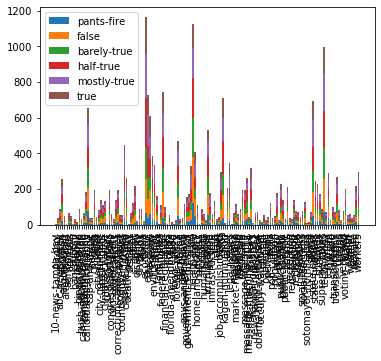

In [21]:
fig, ax = plt.subplots()
for i in range(len(label_types)):
#     counts = [x[i] for x in subject_dict.values()]
# #     print(counts)
#     ax.bar(subject_cols, counts)
    counts = [x[i] for x in subject_dict.values()]
#     print(counts)
    if i == 0:
        ax.bar(subject_cols, counts, label=label_types[i])
        sum_counts = counts
    else:
        ax.bar(subject_cols, counts, bottom=sum_counts, label=label_types[i])
        sum_counts = [i + j for i,j in zip(sum_counts, counts)]
plt.legend(label_types)
plt.xticks(rotation=90)
plt.show()

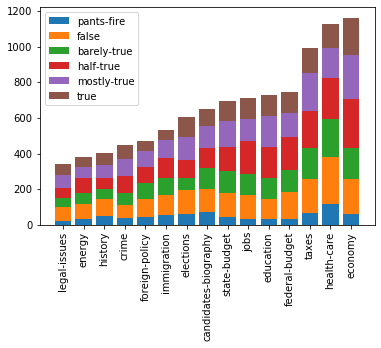

In [22]:
sorted_tuples = sorted(subject_dict.items(), key=lambda item: np.sum(item[1]))
k = 15
topk_subjects = sorted_tuples[-k:]
# print(topk_subjects)  # [(1, 1), (3, 4), (2, 9)]

topk_subject_names = [x[0] for x in topk_subjects]
fig, ax = plt.subplots()

for i in range(len(label_types)):
    counts = [x[1][i] for x in topk_subjects]
#     print(counts)
    if i == 0:
        ax.bar(topk_subject_names, counts, label=label_types[i])
        sum_counts = counts
    else:
        ax.bar(topk_subject_names, counts, bottom=sum_counts, label=label_types[i])
        sum_counts = [i + j for i,j in zip(sum_counts, counts)]
#     print(sum_counts)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [23]:
topk_subject_names

['legal-issues',
 'energy',
 'history',
 'crime',
 'foreign-policy',
 'immigration',
 'elections',
 'candidates-biography',
 'state-budget',
 'jobs',
 'education',
 'federal-budget',
 'taxes',
 'health-care',
 'economy']

In [24]:
# analyze speakers
dummies = pd.get_dummies(train['speaker'], prefix='speaker')
train = pd.concat([train.drop(['speaker'], axis=1), dummies], axis=1)
speaker_columns = dummies.columns

In [25]:
for speaker_col in speaker_columns:
    print(speaker_col)

speaker_18-percent-american-public
speaker_60-plus-association
speaker_AARP
speaker_Arizona-Citizens-Defense-League
speaker_Ballesteros
speaker_Coast-Guard
speaker_GaGOP
speaker_Kiplinger-com
speaker_Yes-on-79
speaker_abel-collins
speaker_accountability-government
speaker_accountability-project
speaker_aclu-florida
speaker_aclu-georgia-foundation
speaker_aclu-north-carolina
speaker_actionaid-k
speaker_adam-hasner
speaker_adam-kinzinger
speaker_adam-putnam
speaker_adam-schefter
speaker_addicting-information
speaker_advancing-wisconsin
speaker_afl-cio
speaker_afscme
speaker_afscme-people
speaker_agenda-project
speaker_akbar-al-baker
speaker_al-cardenas
speaker_al-gore
speaker_al-hunt
speaker_al-jazeera-america
speaker_al-roker
speaker_al-sharpton
speaker_alan-grayson
speaker_alan-hays
speaker_alan-krueger
speaker_alan-powell
speaker_alan-simpson
speaker_alberta-darling
speaker_alberto-carvalho
speaker_albio-sires
speaker_alcee-hastings
speaker_alex-castellanos
speaker_alex-mcmurtrie-jr
s

speaker_ken-hodges
speaker_ken-langone
speaker_ken-legler
speaker_ken-mercer
speaker_ken-paxton
speaker_ken-plum
speaker_ken-tanner
speaker_kendall-jones
speaker_kendrick-meek
speaker_kenneth-block
speaker_kenneth-mckay
speaker_kent-conrad
speaker_kentucky-opportunity-coalition
speaker_kernan-kerry-king
speaker_kesha-rogers
speaker_kevin-boyce
speaker_kevin-brady
speaker_kevin-cameron
speaker_kevin-coughlin
speaker_kevin-de-leon
speaker_kevin-dewine
speaker_kevin-flynn
speaker_kevin-levitas
speaker_kevin-mccarthy
speaker_kevin-otoole
speaker_kevin-rader
speaker_kevin-reilly
speaker_kiki-curls
speaker_kim-guadagno
speaker_kim-simac
speaker_kim-thatcher
speaker_kimberly-guilfoyle
speaker_kinky-friedman
speaker_kip-kendrick
speaker_kirk-cox
speaker_kirk-watson
speaker_kirsten-gillibrand
speaker_kitty-boitnott
speaker_kitty-rhoades
speaker_kofi-annan
speaker_kris-jordan
speaker_kurt-bauer
speaker_kurt-browning
speaker_kurt-schrader
speaker_kyleen-wright
speaker_kyrsten-sinema
speaker_la-ra

speaker_stephen-lisauskas
speaker_stephen-martin
speaker_stephen-nodine
speaker_stephen-sweeney
speaker_stephen-zappala
speaker_steve-acenbrak
speaker_steve-adler
speaker_steve-archambault
speaker_steve-brown
speaker_steve-buckstein
speaker_steve-case
speaker_steve-chabot
speaker_steve-cohen
speaker_steve-crisafulli
speaker_steve-doell
speaker_steve-doocy
speaker_steve-forbes
speaker_steve-goreham
speaker_steve-israel
speaker_steve-kagen
speaker_steve-king
speaker_steve-latourette
speaker_steve-leslie
speaker_steve-lonegan
speaker_steve-loomis
speaker_steve-mcqueen
speaker_steve-moore
speaker_steve-munisteri
speaker_steve-oelrich
speaker_steve-ogden
speaker_steve-oroho
speaker_steve-poizner
speaker_steve-rothman
speaker_steve-santarsiero
speaker_steve-scalise
speaker_steve-southerland
speaker_steve-spinnett
speaker_steve-stockman
speaker_steve-wise
speaker_steven-brown
speaker_steven-emerson
speaker_steven-frias
speaker_steven-goldstein
speaker_steven-king
speaker_steven-landes
speaker

In [26]:
# check relationships between speakers and labels
print(speaker_columns)
speaker_dict = {}
label_types = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
for lt in label_types:
    for s in speaker_columns:
#         temp = train.apply(lambda x : True 
#                             if x[s] == 1 and x['label'] == lt else False, axis = 1)
#         count = len(temp[temp == True].index)
#         print(count)
        count = train[(train[s] == 1) & (train['label'] == lt)].count()[0] # label is at 0th index
#         print(count)
#         print('s: {} lt: {}'.format(s, lt))
        if s in speaker_dict:
            speaker_dict[s].append(count)
        else:
            speaker_dict[s] = [count]
    print('finished: ', lt)

Index(['speaker_18-percent-american-public', 'speaker_60-plus-association',
       'speaker_AARP', 'speaker_Arizona-Citizens-Defense-League',
       'speaker_Ballesteros', 'speaker_Coast-Guard', 'speaker_GaGOP',
       'speaker_Kiplinger-com', 'speaker_Yes-on-79', 'speaker_abel-collins',
       ...
       'speaker_yes-84', 'speaker_yg-action-fund', 'speaker_yolanda-adrean',
       'speaker_young-americans-liberty', 'speaker_young-conservatives-texas',
       'speaker_yvette-mcgee-brown', 'speaker_zack-space',
       'speaker_zell-miller', 'speaker_zephyr-teachout',
       'speaker_zoe-lofgren'],
      dtype='object', length=2910)
finished:  pants-fire
finished:  false
finished:  barely-true
finished:  half-true
finished:  mostly-true
finished:  true


In [27]:
print(train['speaker_barack-obama'].value_counts())
print(train['speaker_donald-trump'].value_counts())

0    9750
1     488
Name: speaker_barack-obama, dtype: int64
0    9965
1     273
Name: speaker_donald-trump, dtype: int64


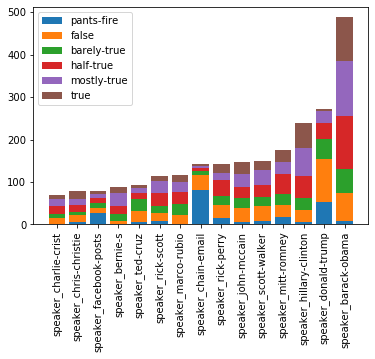

In [28]:
sorted_tuples = sorted(speaker_dict.items(), key=lambda item: np.sum(item[1]))
k = 15
topk_speakers = sorted_tuples[-k:]
# print(topk_speakers)  # [(1, 1), (3, 4), (2, 9)]

topk_speakers_names = [x[0] for x in topk_speakers]
fig, ax = plt.subplots()

for i in range(len(label_types)):
    counts = [x[1][i] for x in topk_speakers]
#     print(counts)
    if i == 0:
        ax.bar(topk_speakers_names, counts, label=label_types[i])
        sum_counts = counts
    else:
        ax.bar(topk_speakers_names, counts, bottom=sum_counts, label=label_types[i])
        sum_counts = [i + j for i,j in zip(sum_counts, counts)]
#     print(sum_counts)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [29]:
# party affiliation
dummies = pd.get_dummies(train['party_affiliation'], prefix='party_affiliation')
train = pd.concat([train.drop(['party_affiliation'], axis=1), dummies], axis=1)
party_affiliation_columns = dummies.columns

In [30]:
train.head()

,label,statement,speaker_job_title,state_info,barely_true,false,half_true,mostly_true,pants_on_fire,context,...,party_affiliation_liberal-party-canada,party_affiliation_libertarian,party_affiliation_newsmaker,party_affiliation_none,party_affiliation_ocean-state-tea-party-action,party_affiliation_organization,party_affiliation_republican,party_affiliation_state-official,party_affiliation_talk-show-host,party_affiliation_tea-party-member
0,false,Says the Annies List political group supports ...,State representative,Texas,0.0,1.0,0.0,0.0,0.0,a mailer,...,0,0,0,0,0,0,1,0,0,0
1,half-true,When did the decline of coal start? It started...,State delegate,Virginia,0.0,0.0,1.0,1.0,0.0,a floor speech.,...,0,0,0,0,0,0,0,0,0,0
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",President,Illinois,70.0,71.0,160.0,163.0,9.0,Denver,...,0,0,0,0,0,0,0,0,0,0
3,false,Health care reform legislation is likely to ma...,NaN,NaN,7.0,19.0,3.0,5.0,44.0,a news release,...,0,0,0,1,0,0,0,0,0,0
4,half-true,The economic turnaround started at the end of ...,NaN,Florida,15.0,9.0,20.0,19.0,2.0,an interview on CNN,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# check relationships between party_affiliation and labels
print(party_affiliation_columns)
party_affiliation_dict = {}
label_types = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
for lt in label_types:
    for s in party_affiliation_columns:
#         temp = train.apply(lambda x : True 
#                             if x[s] == 1 and x['label'] == lt else False, axis = 1)
#         count = len(temp[temp == True].index)
#         print(count)
        count = train[(train[s] == 1) & (train['label'] == lt)].count()[0] # label is at 0th index
#         print(count)
#         print('s: {} lt: {}'.format(s, lt))
        if s in party_affiliation_dict:
            party_affiliation_dict[s].append(count)
        else:
            party_affiliation_dict[s] = [count]
    print('finished: ', lt)

Index(['party_affiliation_Moderate', 'party_affiliation_activist',
       'party_affiliation_business-leader', 'party_affiliation_columnist',
       'party_affiliation_constitution-party', 'party_affiliation_democrat',
       'party_affiliation_democratic-farmer-labor',
       'party_affiliation_education-official',
       'party_affiliation_government-body', 'party_affiliation_green',
       'party_affiliation_independent', 'party_affiliation_journalist',
       'party_affiliation_labor-leader',
       'party_affiliation_liberal-party-canada',
       'party_affiliation_libertarian', 'party_affiliation_newsmaker',
       'party_affiliation_none',
       'party_affiliation_ocean-state-tea-party-action',
       'party_affiliation_organization', 'party_affiliation_republican',
       'party_affiliation_state-official', 'party_affiliation_talk-show-host',
       'party_affiliation_tea-party-member'],
      dtype='object')
finished:  pants-fire
finished:  false
finished:  barely-true
finish

In [32]:
print(train['party_affiliation_republican'].value_counts())
print(train['party_affiliation_democrat'].value_counts())

0    5741
1    4497
Name: party_affiliation_republican, dtype: int64
0    6902
1    3336
Name: party_affiliation_democrat, dtype: int64


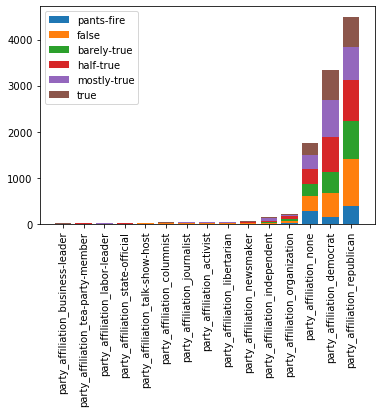

In [33]:
sorted_tuples = sorted(party_affiliation_dict.items(), key=lambda item: np.sum(item[1]))
k = 15
topk_party_affiliations = sorted_tuples[-k:]
# print(topk_party_affiliations)  # [(1, 1), (3, 4), (2, 9)]

topk_party_affiliations_names = [x[0] for x in topk_party_affiliations]
fig, ax = plt.subplots()

for i in range(len(label_types)):
    counts = [x[1][i] for x in topk_party_affiliations]
#     print(counts)
    if i == 0:
        ax.bar(topk_party_affiliations_names, counts, label=label_types[i])
        sum_counts = counts
    else:
        ax.bar(topk_party_affiliations_names, counts, bottom=sum_counts, label=label_types[i])
        sum_counts = [i + j for i,j in zip(sum_counts, counts)]
#     print(sum_counts)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [34]:
# speaker job title
dummies = pd.get_dummies(train['speaker_job_title'], prefix='speaker_job_title')
train = pd.concat([train.drop(['speaker_job_title'], axis=1), dummies], axis=1)
speaker_job_title_columns = dummies.columns

In [35]:
train.head()

,label,statement,state_info,barely_true,false,half_true,mostly_true,pants_on_fire,context,10-news-tampa-bay,...,speaker_job_title_transportation consultant,"speaker_job_title_transportation director, city of Roswell",speaker_job_title_venture capital company founder,speaker_job_title_venture capitalist,speaker_job_title_vice president of Phantom Fireworks,"speaker_job_title_vice president, Hilex Poly Co.","speaker_job_title_vice president, Rhode Island State Association of Firefighters",speaker_job_title_video,speaker_job_title_website,speaker_job_title_writer
0,false,Says the Annies List political group supports ...,Texas,0.0,1.0,0.0,0.0,0.0,a mailer,0,...,0,0,0,0,0,0,0,0,0,0
1,half-true,When did the decline of coal start? It started...,Virginia,0.0,0.0,1.0,1.0,0.0,a floor speech.,0,...,0,0,0,0,0,0,0,0,0,0
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Illinois,70.0,71.0,160.0,163.0,9.0,Denver,0,...,0,0,0,0,0,0,0,0,0,0
3,false,Health care reform legislation is likely to ma...,NaN,7.0,19.0,3.0,5.0,44.0,a news release,0,...,0,0,0,0,0,0,0,0,0,0
4,half-true,The economic turnaround started at the end of ...,Florida,15.0,9.0,20.0,19.0,2.0,an interview on CNN,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# some kind of replicates in here like ABC News, ABC News cheif White House correspondant, etc? what to do?
for speaker_job_title_col in speaker_job_title_columns:
    print(speaker_job_title_col)

speaker_job_title_ secretary-general of the United Nations
speaker_job_title_4th Congressional District's congressman
speaker_job_title_501 (c) (4) educational group
speaker_job_title_8th District congressional candidate
speaker_job_title_9-12 member in Tampa
speaker_job_title_A liberal-oriented advocacy organization
speaker_job_title_A ride-sharing service
speaker_job_title_ABC News
speaker_job_title_ABC News chief White House correspondent
speaker_job_title_ABC News' Chief Health and Medical Editor. 
speaker_job_title_Activist group
speaker_job_title_Actor
speaker_job_title_Actor and director
speaker_job_title_Actor, director, activist
speaker_job_title_Advertising executive
speaker_job_title_Adviser
speaker_job_title_Advocacy
speaker_job_title_Advocacy group
speaker_job_title_Advocacy group for U.S. policy toward Israel
speaker_job_title_Affiliated professor of public policy at Georgetown University's Public Policy Institute
speaker_job_title_Airport owner
speaker_job_title_Alaska D

In [37]:
# check relationships between speaker job title and labels
print(speaker_job_title_columns)
speaker_job_title_dict = {}
label_types = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
for lt in label_types:
    for s in speaker_job_title_columns:
#         temp = train.apply(lambda x : True 
#                             if x[s] == 1 and x['label'] == lt else False, axis = 1)
#         count = len(temp[temp == True].index)
#         print(count)
        count = train[(train[s] == 1) & (train['label'] == lt)].count()[0] # label is at 0th index
#         print(count)
#         print('s: {} lt: {}'.format(s, lt))
        if s in speaker_job_title_dict:
            speaker_job_title_dict[s].append(count)
        else:
            speaker_job_title_dict[s] = [count]
    print('finished: ', lt)

Index(['speaker_job_title_ secretary-general of the United Nations',
       'speaker_job_title_4th Congressional District's congressman',
       'speaker_job_title_501 (c) (4) educational group',
       'speaker_job_title_8th District congressional candidate',
       'speaker_job_title_9-12 member in Tampa',
       'speaker_job_title_A liberal-oriented advocacy organization',
       'speaker_job_title_A ride-sharing service',
       'speaker_job_title_ABC News',
       'speaker_job_title_ABC News chief White House correspondent',
       'speaker_job_title_ABC News' Chief Health and Medical Editor. ',
       ...
       'speaker_job_title_transportation consultant',
       'speaker_job_title_transportation director, city of Roswell',
       'speaker_job_title_venture capital company founder',
       'speaker_job_title_venture capitalist',
       'speaker_job_title_vice president of Phantom Fireworks',
       'speaker_job_title_vice president, Hilex Poly Co.',
       'speaker_job_title_vi

In [38]:
print(train['speaker_job_title_President'].value_counts())
print(train['speaker_job_title_U.S. Senator'].value_counts())
print(train['speaker_job_title_None'].value_counts())

0    9746
1     492
Name: speaker_job_title_President, dtype: int64
0    9759
1     479
Name: speaker_job_title_U.S. Senator, dtype: int64
0    10237
1        1
Name: speaker_job_title_None, dtype: int64


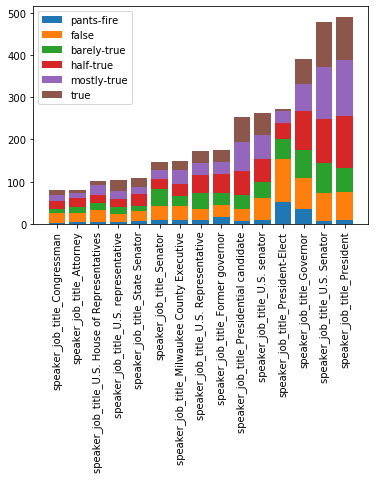

In [39]:
sorted_tuples = sorted(speaker_job_title_dict.items(), key=lambda item: np.sum(item[1]))
k = 15
topk_speaker_job_titles = sorted_tuples[-k:]
# print(topk_speaker_job_titles)  # [(1, 1), (3, 4), (2, 9)]

topk_speaker_job_titles_names = [x[0] for x in topk_speaker_job_titles]
fig, ax = plt.subplots()

for i in range(len(label_types)):
    counts = [x[1][i] for x in topk_speaker_job_titles]
#     print(counts)
    if i == 0:
        ax.bar(topk_speaker_job_titles_names, counts, label=label_types[i])
        sum_counts = counts
    else:
        ax.bar(topk_speaker_job_titles_names, counts, bottom=sum_counts, label=label_types[i])
        sum_counts = [i + j for i,j in zip(sum_counts, counts)]
#     print(sum_counts)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [40]:
# state info
dummies = pd.get_dummies(train['state_info'], prefix='state_info')
train = pd.concat([train.drop(['state_info'], axis=1), dummies], axis=1)
state_info_columns = dummies.columns

In [41]:
train.head()

,label,statement,barely_true,false,half_true,mostly_true,pants_on_fire,context,10-news-tampa-bay,Alcohol,...,state_info_Washington DC,state_info_Washington state,"state_info_Washington, D.C.","state_info_Washington, D.C.",state_info_West Virginia,state_info_Wisconsin,state_info_Wisconsin,state_info_Wyoming,state_info_ohio,state_info_the United States
0,false,Says the Annies List political group supports ...,0.0,1.0,0.0,0.0,0.0,a mailer,0,0,...,0,0,0,0,0,0,0,0,0,0
1,half-true,When did the decline of coal start? It started...,0.0,0.0,1.0,1.0,0.0,a floor speech.,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",70.0,71.0,160.0,163.0,9.0,Denver,0,0,...,0,0,0,0,0,0,0,0,0,0
3,false,Health care reform legislation is likely to ma...,7.0,19.0,3.0,5.0,44.0,a news release,0,0,...,0,0,0,0,0,0,0,0,0,0
4,half-true,The economic turnaround started at the end of ...,15.0,9.0,20.0,19.0,2.0,an interview on CNN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# multiple washington DCs?, multiple Rhode Island, multiple Virginia spellings?
for state_info_col in state_info_columns:
    print(state_info_col)

state_info_Alabama
state_info_Alaska
state_info_Arizona
state_info_Arkansas
state_info_Atlanta
state_info_California
state_info_California 
state_info_China
state_info_Colorado
state_info_Colorado 
state_info_Connecticut
state_info_Delaware
state_info_District of Columbia
state_info_Florida
state_info_Florida 
state_info_Georgia
state_info_Georgia 
state_info_Hawaii
state_info_Idaho
state_info_Illinois
state_info_Illinois 
state_info_Indiana
state_info_Iowa
state_info_Kansas
state_info_Kentucky
state_info_Louisiana
state_info_Maine
state_info_Maryland
state_info_Massachusetts
state_info_Massachusetts 
state_info_Michigan
state_info_Minnesota
state_info_Mississippi
state_info_Missouri
state_info_Montana
state_info_Nebraska
state_info_Nevada
state_info_New Hampshire
state_info_New Hampshire 
state_info_New Jersey
state_info_New Mexico
state_info_New York
state_info_New York 
state_info_None
state_info_North Carolina
state_info_North Dakota
state_info_Ohio
state_info_Oklahoma
state_info_O

In [43]:
# check relationships between state info and labels
print(state_info_columns)
state_info_dict = {}
label_types = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
for lt in label_types:
    for s in state_info_columns:
#         temp = train.apply(lambda x : True 
#                             if x[s] == 1 and x['label'] == lt else False, axis = 1)
#         count = len(temp[temp == True].index)
#         print(count)
        # print(train[s])
        count = train[(train[s] == 1) & (train['label'] == lt)].count()[0] # label is at 0th index
#         print(count)
#         print('s: {} lt: {}'.format(s, lt))
        if s in state_info_dict:
            state_info_dict[s].append(count)
        else:
            state_info_dict[s] = [count]
    print('finished: ', lt)

Index(['state_info_Alabama', 'state_info_Alaska', 'state_info_Arizona',
       'state_info_Arkansas', 'state_info_Atlanta', 'state_info_California',
       'state_info_California ', 'state_info_China', 'state_info_Colorado',
       'state_info_Colorado ', 'state_info_Connecticut', 'state_info_Delaware',
       'state_info_District of Columbia', 'state_info_Florida',
       'state_info_Florida ', 'state_info_Georgia', 'state_info_Georgia ',
       'state_info_Hawaii', 'state_info_Idaho', 'state_info_Illinois',
       'state_info_Illinois ', 'state_info_Indiana', 'state_info_Iowa',
       'state_info_Kansas', 'state_info_Kentucky', 'state_info_Louisiana',
       'state_info_Maine', 'state_info_Maryland', 'state_info_Massachusetts',
       'state_info_Massachusetts ', 'state_info_Michigan',
       'state_info_Minnesota', 'state_info_Mississippi', 'state_info_Missouri',
       'state_info_Montana', 'state_info_Nebraska', 'state_info_Nevada',
       'state_info_New Hampshire', 'state_info_N

In [44]:
print(train['state_info_Texas'].value_counts())
print(train['state_info_Florida'].value_counts())

0    9229
1    1009
Name: state_info_Texas, dtype: int64
0    9241
1     997
Name: state_info_Florida, dtype: int64


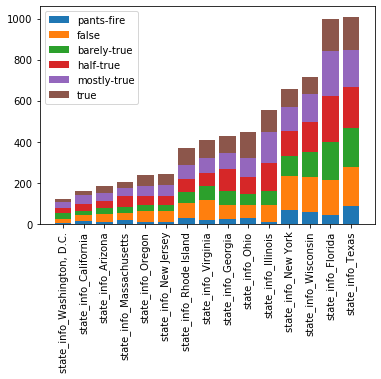

In [45]:
sorted_tuples = sorted(state_info_dict.items(), key=lambda item: np.sum(item[1]))
k = 15
topk_state_info = sorted_tuples[-k:]
# print(topk_state_info)  # [(1, 1), (3, 4), (2, 9)]

topk_state_info_names = [x[0] for x in topk_state_info]
fig, ax = plt.subplots()

for i in range(len(label_types)):
    counts = [x[1][i] for x in topk_state_info]
#     print(counts)
    if i == 0:
        ax.bar(topk_state_info_names, counts, label=label_types[i])
        sum_counts = counts
    else:
        ax.bar(topk_state_info_names, counts, bottom=sum_counts, label=label_types[i])
        sum_counts = [i + j for i,j in zip(sum_counts, counts)]
#     print(sum_counts)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [46]:
# context
print(train['context'].unique())
print(len(train['context'].unique()))

['a mailer' 'a floor speech.' 'Denver' ...
 'a recorded telephone message to Cranston residents'
 'interview on "The Colbert Report"'
 "a televised debate on Miami's WPLG-10 against Kendrick Meek."]
4346
